<a href="https://colab.research.google.com/github/Dhanyabahadur/project_notebooks/blob/main/build_makemore_mlp_yay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# build teh vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build teh dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '---->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [64]:
# build teh dataset

def build_dataset(words):
  block_size = 3 # context length : how many characters we take to predict the next one?
  X, Y = [], []
  for w in words:

    # print(w)
    context = [0]*block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [65]:
n1

25626

In [66]:
n2

28829

In [67]:
n2-n1

3203

In [8]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [9]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [10]:
C = torch.randn((27, 2))

In [11]:
C[5]

tensor([-1.2141,  0.1688])

In [12]:
F.one_hot(5, num_classes = 27)

TypeError: one_hot(): argument 'input' (position 1) must be Tensor, not int

In [ ]:
F.one_hot(torch.tensor(5), num_classes = 27)

In [ ]:
type(F.one_hot(torch.tensor(5), num_classes = 27))

In [ ]:
type(C)

In [13]:
C

tensor([[ 0.4877, -0.4700],
        [ 1.5513,  1.7473],
        [ 0.5424,  0.4008],
        [ 0.3484, -0.0119],
        [-0.7480,  0.8098],
        [-1.2141,  0.1688],
        [-0.2804, -1.4192],
        [ 0.2409,  0.8908],
        [ 0.9798,  1.5785],
        [ 1.4001, -2.1936],
        [ 0.3224,  0.8861],
        [-0.8425, -1.1060],
        [ 0.4613, -0.6009],
        [-0.0475, -2.2391],
        [-0.4002, -0.8425],
        [-0.1098,  0.8438],
        [ 0.0703, -0.0431],
        [ 1.5790, -0.0762],
        [ 1.4594, -1.3561],
        [-0.4596,  0.8344],
        [-0.2109, -0.1610],
        [ 0.3004, -0.9559],
        [ 0.0056,  0.8715],
        [ 1.4313,  0.3826],
        [-1.2412, -1.8011],
        [ 1.2630, -1.6172],
        [ 0.3386,  0.7162]])

In [14]:
F.one_hot(torch.tensor(5), num_classes = 27) @ C

RuntimeError: expected m1 and m2 to have the same dtype, but got: long int != float

In [ ]:
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

In [ ]:
C[5]

In [15]:
C[[5, 6, 7]]

tensor([[-1.2141,  0.1688],
        [-0.2804, -1.4192],
        [ 0.2409,  0.8908]])

In [16]:
C[torch.tensor([5, 6, 7])]

tensor([[-1.2141,  0.1688],
        [-0.2804, -1.4192],
        [ 0.2409,  0.8908]])

In [17]:
C[torch.tensor([5,6, 7, 7, 7])]

tensor([[-1.2141,  0.1688],
        [-0.2804, -1.4192],
        [ 0.2409,  0.8908],
        [ 0.2409,  0.8908],
        [ 0.2409,  0.8908]])

In [18]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [19]:
C[X]

tensor([[[ 0.4877, -0.4700],
         [ 0.4877, -0.4700],
         [ 0.4877, -0.4700]],

        [[ 0.4877, -0.4700],
         [ 0.4877, -0.4700],
         [-1.2141,  0.1688]],

        [[ 0.4877, -0.4700],
         [-1.2141,  0.1688],
         [-0.0475, -2.2391]],

        ...,

        [[ 0.3386,  0.7162],
         [ 0.3386,  0.7162],
         [ 1.2630, -1.6172]],

        [[ 0.3386,  0.7162],
         [ 1.2630, -1.6172],
         [ 0.3386,  0.7162]],

        [[ 1.2630, -1.6172],
         [ 0.3386,  0.7162],
         [-1.2412, -1.8011]]])

In [20]:
C[X].shape

torch.Size([228146, 3, 2])

In [21]:
X[13, 2]

tensor(1)

In [22]:
C[X][13,2]

tensor([1.5513, 1.7473])

In [23]:
C[1]

tensor([1.5513, 1.7473])

In [24]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [25]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [26]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (684438x2 and 6x100)

In [27]:
emb[:, 0, :].shape

torch.Size([228146, 2])

In [28]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([228146, 6])

In [29]:
len(torch.unbind(emb, 1))

3

In [30]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([228146, 6])

In [31]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [32]:
a.shape

torch.Size([18])

In [33]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [34]:
a.view(9, 2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [35]:
a.view(3,3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [36]:
a.storage()

<ipython-input-36-d39b3459ecdd>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [37]:
emb.shape

torch.Size([228146, 3, 2])

In [38]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

RuntimeError: shape '[32, 6]' is invalid for input of size 1368876

In [ ]:
###### final code
C = torch.randn((27,2))

In [ ]:
emb = C[X]
emb.shape

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [39]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [40]:
h.shape

torch.Size([228146, 100])

In [41]:
(emb.view(-1, 6) @ W1).shape

torch.Size([228146, 100])

In [42]:
b1.shape

torch.Size([100])

In [43]:
# 32, 100
#  1, 100

In [44]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [45]:
logits = h @ W2 + b2

In [46]:
logits.shape

torch.Size([228146, 27])

In [47]:
counts = logits.exp()

In [48]:
prob = counts / counts.sum(1, keepdims=True)

In [49]:
prob.shape

torch.Size([228146, 27])

In [50]:
prob

tensor([[1.0881e-03, 3.1663e-04, 5.4442e-08,  ..., 2.0073e-08, 1.1586e-06,
         3.1070e-08],
        [2.7151e-07, 1.8295e-06, 1.5714e-13,  ..., 1.8427e-05, 6.0042e-02,
         5.1638e-11],
        [1.1545e-08, 8.3487e-05, 2.7563e-10,  ..., 1.8473e-04, 1.3565e-08,
         1.7255e-12],
        ...,
        [1.8449e-06, 7.8970e-11, 1.4145e-09,  ..., 1.5277e-08, 1.3497e-06,
         2.0661e-08],
        [1.3746e-02, 2.3600e-02, 2.8856e-08,  ..., 3.5485e-09, 7.5121e-06,
         4.4499e-01],
        [1.4824e-12, 2.5194e-09, 9.8336e-13,  ..., 1.0381e-03, 9.6539e-07,
         5.3903e-18]])

In [51]:
prob[0].sum()

tensor(1.)

In [52]:
prob[torch.arange(32), Y]

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [53]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [ ]:
torch.arange(32)

In [ ]:
Y

In [ ]:
# ------------- now made respectable :) ------------

In [68]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [110]:
g = torch.Generator().manual_seed(42) # for reproducibility
C = torch.randn((27, 15), generator=g)
W1 = torch.randn((45, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [111]:
sum(p.nelement() for p in parameters) # number of parameters in total

22332

In [112]:
# emb = C[X] # (32, 3, 2)
# h = torch.tanh(emb.view(-1, 6) @ W1  + b1) # (32, 100)
# logits = h @ W2 + b2 # (32, 27)
# # counts = logits.exp()
# # prob = counts / counts.sum(1, keepdims=True)
# # loss = -prob[torch.arange(32), Y].log().mean()
# loss = F.cross_entropy(logits, Y)
# loss

In [113]:
for p in parameters:
  p.requires_grad = True

In [114]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [115]:
lri = []
lossi = []
stepi = []

In [116]:


for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  # forwrad pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 45) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2  # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.1773083209991455


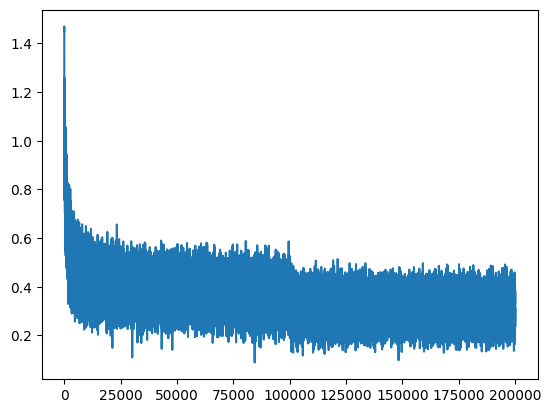

In [117]:
plt.plot(stepi, lossi)

In [118]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0873, grad_fn=<NllLossBackward0>)

In [119]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 45) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1530, grad_fn=<NllLossBackward0>)

In [63]:
# training split, dev/validation split, test split
# 80% , 10%, 10%

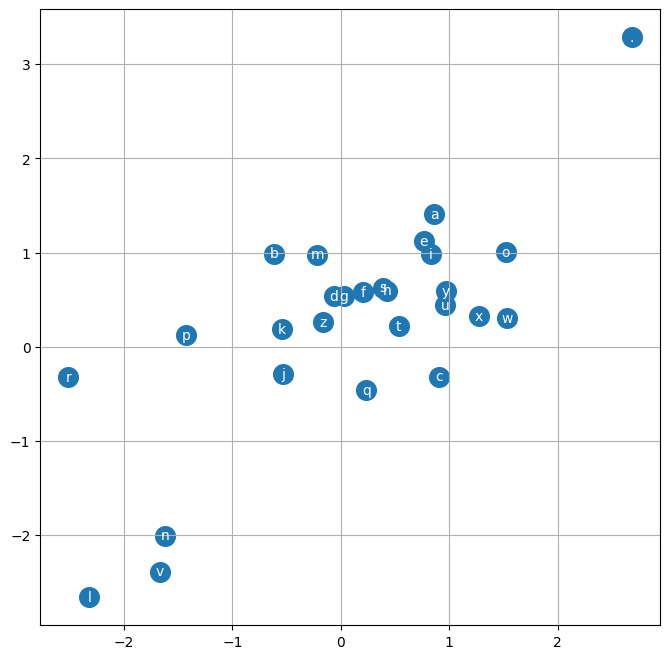

In [120]:
# visualize embeddings

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [121]:
# sample from the model
g = torch.Generator().manual_seed(42)

for _ in range(20):

  out = []
  context = [0] * block_size # initialize with all ....
  while True:
    emb = C[torch.tensor([context])] # (1, block_size, d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

yevonthor.
ben.
dlon.
khalei.
jys.
trycie.
chel.
emberlynn.
iah.
abdiles.
lou.
toy.
alita.
maul.
lanny.
alexsivaley.
xaina.
lun.
caylyn.
zeriaanvi.
